# Coursera Courses Analysis

## Overview
This project involves exploring the Coursera Course Dataset to gain insights and create visualizations based on the data.

In [26]:
# Importing necessary libraries and loading the CSV file to inspect its contents.
import pandas as pd

# Load the coursea_data.csv file
course_data = pd.read_csv('/content/drive/MyDrive/Turing College/data/coursea_data.csv', encoding='utf-8')

# Display the head of the dataframe to understand its structure
course_data.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


## Drop Unnamed: 0 After Loading
Alternatively, if the Unnamed: 0 column is already in the DataFrame, drop it:

In [27]:
course_data = course_data.drop(columns=['Unnamed: 0'])


## Data Cleaning and Exploratory
Next, I will proceed with the data cleaning and exploratory data analysis as specified in the instructions. This will involve checking for missing values, data types, and any necessary transformations before visualizing the data. Let's start with a summary of the dataset to identify any cleaning requirements.

In [29]:
course_data.shape

(891, 6)

In [32]:
course_data.tail()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k
890,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


We realize that some data poinsts have non-ASCII characters

To remove rows with non-ASCII characters in our data, we used Python's str.isascii() method, which returns True only for strings that contain ASCII characters.

In [35]:
# Filter out rows with non-ASCII characters in specified columns
columns_to_check = ['course_title', 'course_organization']  # Add any columns you want to check
course_data = course_data[course_data[columns_to_check].applymap(lambda x: x.isascii()).all(axis=1)]


course_data.tail()

<ipython-input-35-f283a8930825>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  course_data = course_data[course_data[columns_to_check].applymap(lambda x: x.isascii()).all(axis=1)]


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
869,Write Professional Emails in English,Georgia Institute of Technology,COURSE,4.7,Mixed,270k
870,Write Your First Novel,Michigan State University,COURSE,4.4,Beginner,18k
871,Writing in the Sciences,Stanford University,COURSE,4.9,Beginner,140k
872,e-Learning Ecologies: Innovative Approaches to...,University of Illinois at Urbana-Champaign,COURSE,4.5,Mixed,17k
873,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76k


We check how many features exist in our dataset

In [36]:
print(course_data.columns)

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_rating', 'course_difficulty', 'course_students_enrolled'],
      dtype='object')


Checking for missing values

In [37]:
missing_values = course_data.isnull().sum()
missing_values

,0
course_title,0
course_organization,0
course_Certificate_type,0
course_rating,0
course_difficulty,0
course_students_enrolled,0


No missing values we go straight to check data types in the course_data dataframe

In [38]:
summary = course_data.describe(include='all')

# Displaying the summary statistics and missing values
summary

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
count,789,789,789,789.000000,789,789
unique,787,136,3,NaN,4,198
top,Developing Your Musicianship,University of Pennsylvania,COURSE,NaN,Beginner,120k
freq,2,58,512,NaN,432,20
mean,NaN,NaN,NaN,4.671736,NaN,NaN
std,NaN,NaN,NaN,0.164871,NaN,NaN
min,NaN,NaN,NaN,3.300000,NaN,NaN
25%,NaN,NaN,NaN,4.600000,NaN,NaN
50%,NaN,NaN,NaN,4.700000,NaN,NaN
75%,NaN,NaN,NaN,4.800000,NaN,NaN


We realize the `course_students_enrolled` is supposed to be numerical feature. So we go ahead to to handle both strings with suffixes and numeric values

In [39]:
def normalize_enrollment(enrollment):
    if isinstance(enrollment, str):
        if 'k' in enrollment:
            return float(enrollment.replace('k', '').strip()) * 1000
        elif 'm' in enrollment:
            return float(enrollment.replace('m', '').strip()) * 1000000
        else:
            return float(enrollment)
    elif pd.isna(enrollment):  # Return NaN if the value is missing
        return enrollment
    else:
        return float(enrollment)  # If already a numeric value

# Apply the normalization function
course_data['course_students_enrolled'] = course_data['course_students_enrolled'].apply(normalize_enrollment)

# Checking if normalization was successful
cleaned_head = course_data.head()

cleaned_head


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000.0


In [40]:
summary = course_data.describe(include='all')

# Displaying the summary statistics and missing values
summary

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
count,789,789,789,789.000000,789,7.890000e+02
unique,787,136,3,NaN,4,NaN
top,Developing Your Musicianship,University of Pennsylvania,COURSE,NaN,Beginner,NaN
freq,2,58,512,NaN,432,NaN
mean,NaN,NaN,NaN,4.671736,NaN,9.428999e+04
std,NaN,NaN,NaN,0.164871,NaN,1.908368e+05
min,NaN,NaN,NaN,3.300000,NaN,1.600000e+03
25%,NaN,NaN,NaN,4.600000,NaN,1.800000e+04
50%,NaN,NaN,NaN,4.700000,NaN,4.300000e+04
75%,NaN,NaN,NaN,4.800000,NaN,1.100000e+05


In [41]:
course_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000.0


#Exploratory data analysis (EDa) AND Visualization
Next, we will proceed with exploratory data analysis (EDA) to gain insights into the dataset, including visualizations of course ratings, difficulties, and enrollments. Let's start with visualizing the distribution of course ratings and the number of students enrolled in each course.

# distribution of Students enrolled and Course ratings

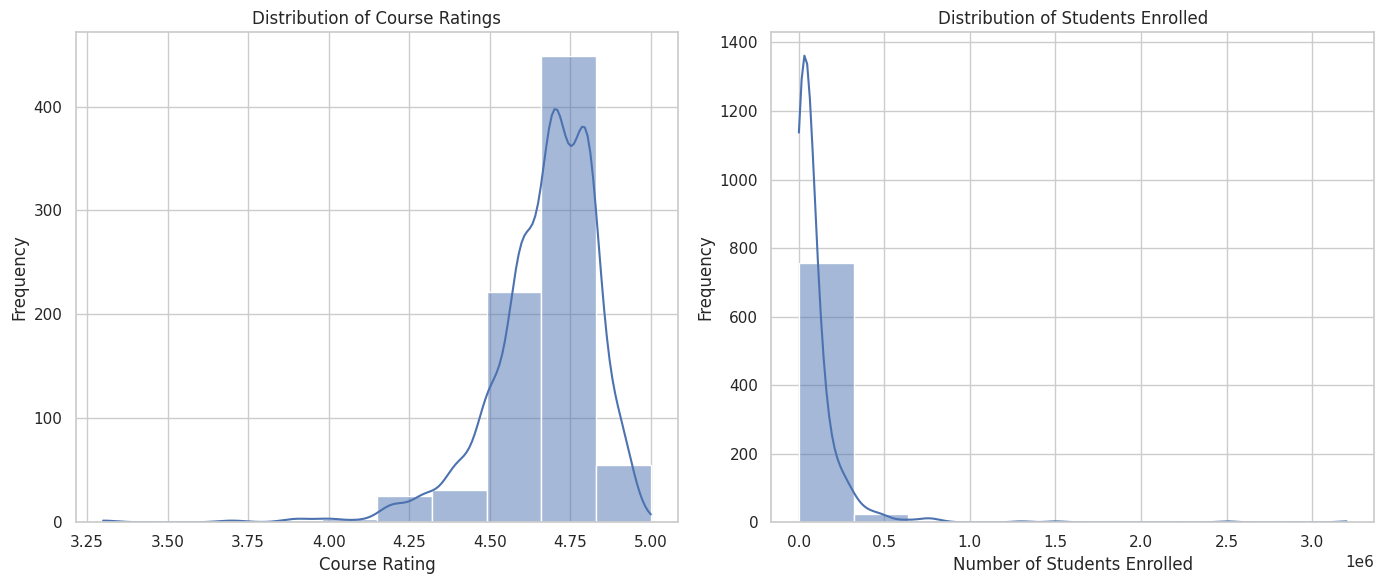

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set(style='whitegrid')

# Creating a figure with subplots for course ratings and enrollments
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the distribution of course ratings
sns.histplot(course_data['course_rating'], bins=10, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Course Ratings')
ax[0].set_xlabel('Course Rating')
ax[0].set_ylabel('Frequency')

# Plotting the distribution of students enrolled
sns.histplot(course_data['course_students_enrolled'], bins=10, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Students Enrolled')
ax[1].set_xlabel('Number of Students Enrolled')
ax[1].set_ylabel('Frequency')

# Displaying the plots
plt.tight_layout()
plt.show()

The first plot shows the distribution of course ratings, which appears to be centered around 4.5 to 4.8, indicating a generally high level of satisfaction among students. The second plot illustrates the distribution of students enrolled, with a significant number of courses having enrollments in the range of 10,000 to 100,000.

Next, I will analyze the relationship between course difficulty and ratings, as well as the average number of students enrolled per difficulty level. This will provide insights into how course difficulty impacts ratings and enrollment. Let's proceed with this analysis.

In [44]:
# Analyzing the relationship between course difficulty and ratings
# Calculating the average rating and average enrollment per difficulty level
difficulty_analysis = course_data.groupby('course_difficulty').agg(
    average_rating=('course_rating', 'mean'),
    average_enrollment=('course_students_enrolled', 'mean')
).reset_index()

# Displaying the analysis results
difficulty_analysis

,course_difficulty,average_rating,average_enrollment
0,Advanced,4.600000,66547.368421
1,Beginner,4.675231,86189.583333
2,Intermediate,4.640116,75140.116279
3,Mixed,4.703614,138387.951807


### Scatter plot for average rating and enrollment by difficulty without legend

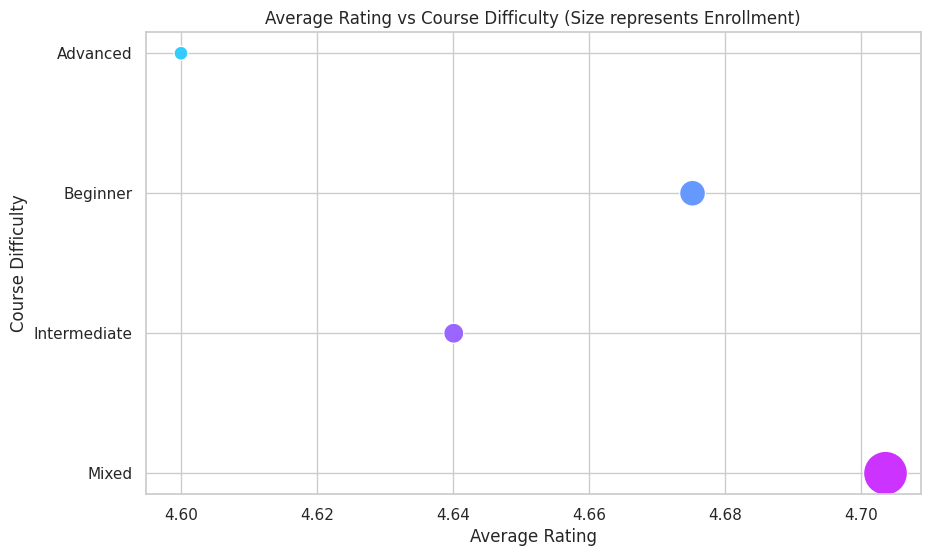

In [47]:
# Scatter plot for average rating and enrollment by difficulty without legend
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=difficulty_analysis,
    x='average_rating',
    y='course_difficulty',
    size='average_enrollment',
    sizes=(100, 1000),
    hue='course_difficulty',
    palette='cool',
    legend=False  # Removes the legend
)
plt.title('Average Rating vs Course Difficulty (Size represents Enrollment)')
plt.xlabel('Average Rating')
plt.ylabel('Course Difficulty')
plt.show()


From the analysis, we can observe that:

Mixed difficulty courses have the highest average rating (approximately 4.71) and attract most students on average (around 133,633).
Advanced and Intermediate courses have slightly lower ratings and enrollments compared to Beginner and Mixed courses.

### Creating a box plot to show the distribution of course ratings across different difficulty levels

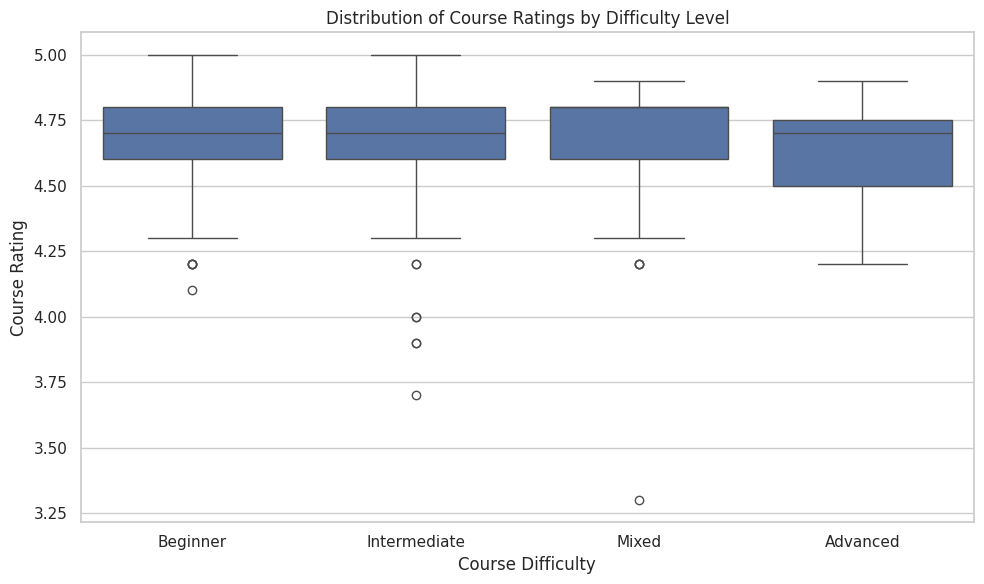

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='course_difficulty', y='course_rating', data=course_data)
plt.title('Distribution of Course Ratings by Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Rating')
plt.tight_layout()
plt.show()

# The correlation heatmap between number of students enrolled vs course rating

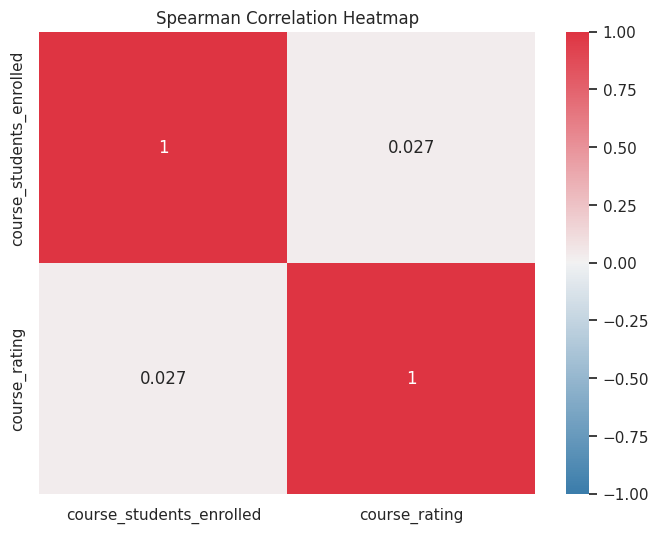

In [72]:
# Selecting only the relevant numeric columns for correlation
numeric_columns = ['course_students_enrolled', 'course_rating']
correlation_matrix = course_data[numeric_columns].corr(method='spearman')

# Plot the correlation heatmap with a blue-grey color palette
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap=sns.diverging_palette(240, 10, n=100, s=80, l=50, as_cmap=True),  # Blue to grey palette
    vmin=-1, vmax=1
)
plt.title('Spearman Correlation Heatmap')
plt.show()

# Number of courses available for each difficulty level

<ipython-input-75-25dc9d55d9e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


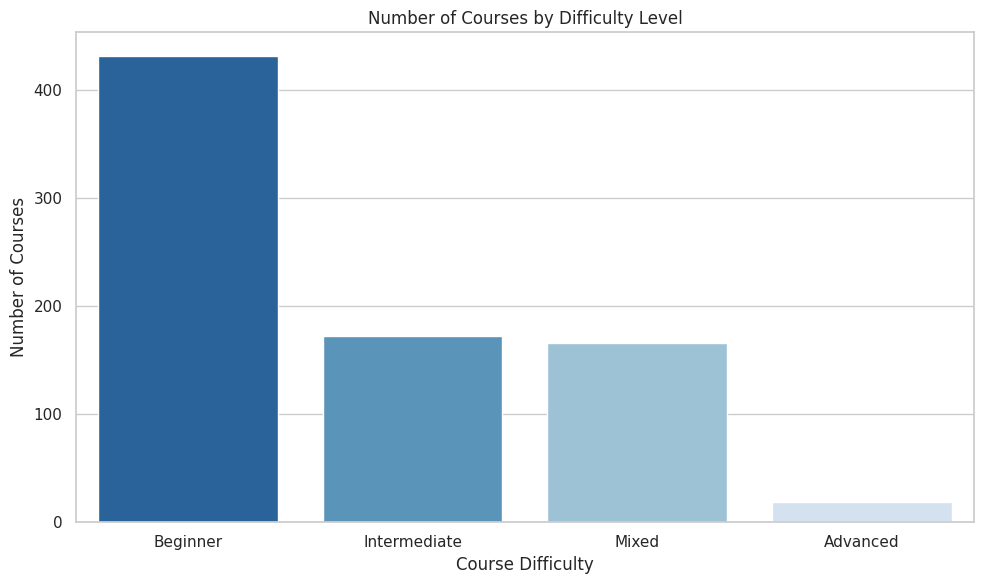

In [75]:
# Calculate the order of difficulty levels by count, from highest to lowest
difficulty_order = course_data['course_difficulty'].value_counts().index

# Set the reversed blue color palette
plt.figure(figsize=(10, 6))
sns.countplot(
    x='course_difficulty',
    data=course_data,
    order=difficulty_order,
    palette='Blues_r'  # Reversed "Blues" palette for darkest color on highest count
)
plt.title('Number of Courses by Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Number of Courses')
plt.tight_layout()
plt.show()

# Creating a histogram to visualize the distribution of course ratings frequency

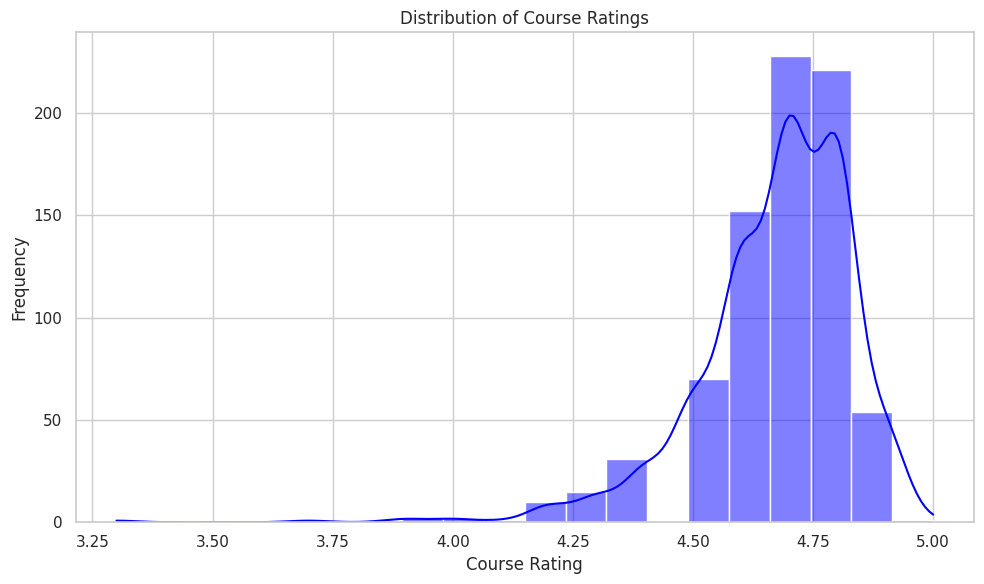

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(course_data['course_rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## The Top 5 and Bottom 5 Organizations
First, you need to sort the data by either average_rating or total_enrollments and then extract the top 5 and bottom 5 organizations.

In [60]:
# Grouping the data by 'course_organization' to calculate average ratings and total enrollments
organization_performance = course_data.groupby('course_organization').agg(
    average_rating=('course_rating', 'mean'),
    total_enrollments=('course_students_enrolled', 'sum')
).reset_index()



In [61]:
# Sorting the data by 'total_enrollments' for the top 5 and bottom 5 organizations
top_5_by_enrollment = organization_performance.nlargest(5, 'total_enrollments')
bottom_5_by_enrollment = organization_performance.nsmallest(5, 'total_enrollments')

<ipython-input-78-1a0b92c978f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


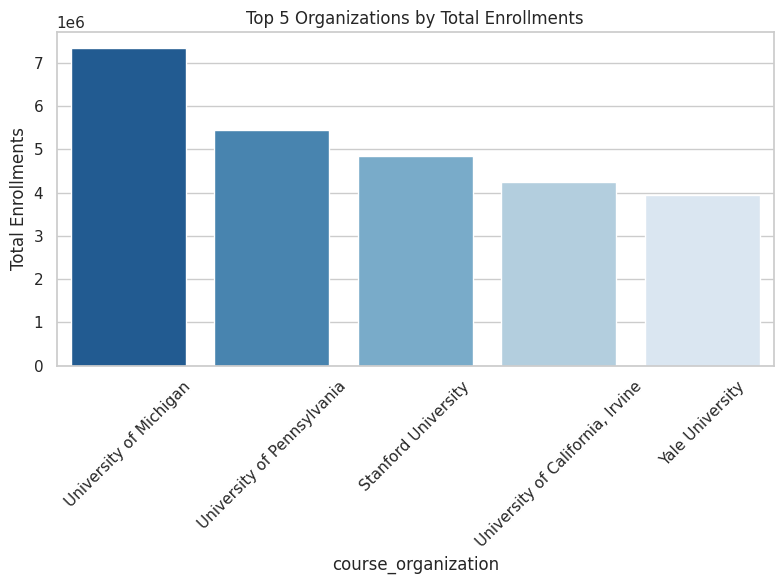

In [78]:
#  Top 5 by Enrollment with blue color palette (darkest for highest)
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_5_by_enrollment,
    x='course_organization',
    y='total_enrollments',
    palette='Blues_r'
)
plt.title('Top 5 Organizations by Total Enrollments')
plt.xticks(rotation=45)
plt.ylabel('Total Enrollments')
plt.tight_layout()
plt.show()

<ipython-input-79-fda4b0b44949>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


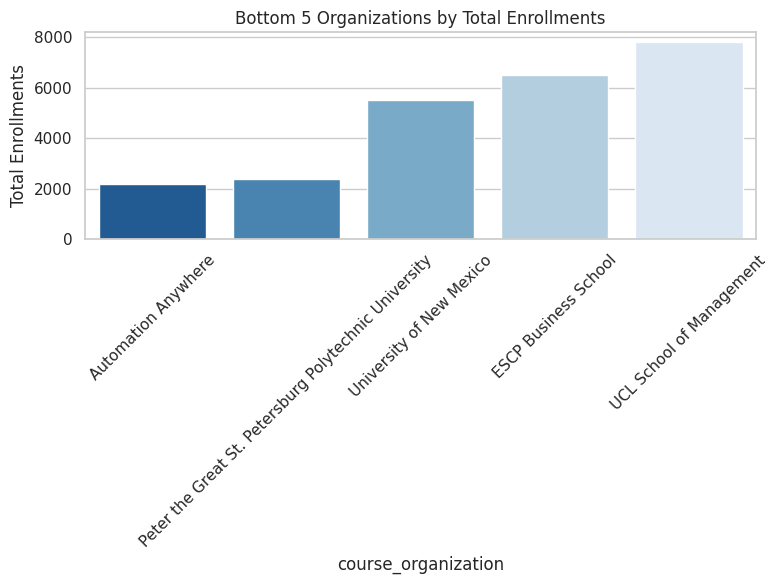

In [79]:
# Bottom 5 by Enrollment
plt.figure(figsize=(8, 6))
sns.barplot(
    data=bottom_5_by_enrollment,
    x='course_organization',
    y='total_enrollments',
    palette='Blues_r'
)
plt.title('Bottom 5 Organizations by Total Enrollments')
plt.xticks(rotation=45)
plt.ylabel('Total Enrollments')
plt.tight_layout()
plt.show()

## Enrollment Distribution by Certificate Type
This bar chart can show the average or total enrollments across different types of certifications, providing insight into the popularity of certification types (e.g., Specialization vs. Course).

<ipython-input-80-e9315e8733ed>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


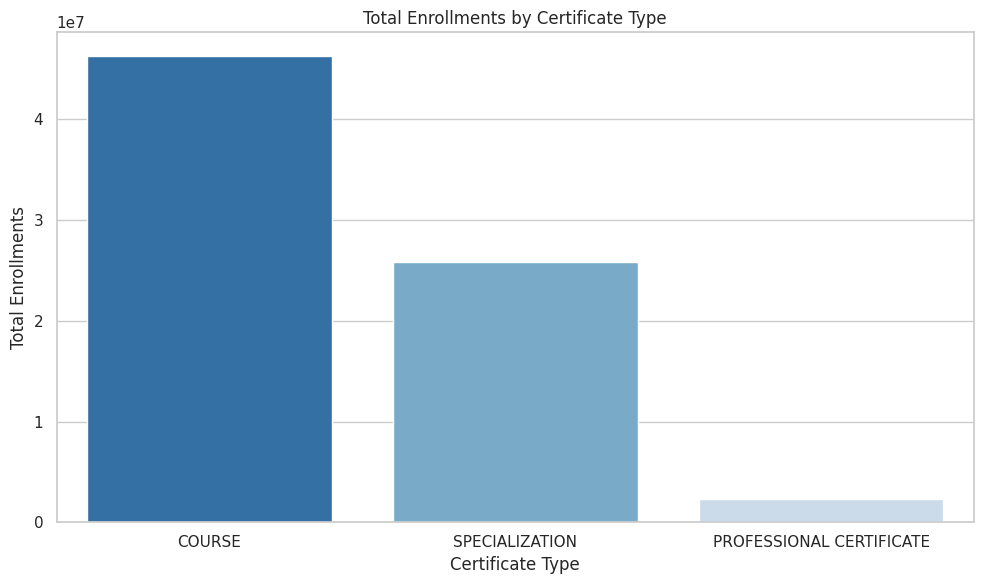

In [80]:
# Group by certificate type and sort by total enrollments
certificate_enrollment = course_data.groupby('course_Certificate_type')['course_students_enrolled'].sum().reset_index()
certificate_enrollment = certificate_enrollment.sort_values(by='course_students_enrolled', ascending=False)

# Create the bar plot with sorted data and blue color palette (darkest for highest)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=certificate_enrollment,
    x='course_Certificate_type',
    y='course_students_enrolled',
    palette='Blues_r'  # Reversed "Blues" palette for darkest color on highest enrollments
)
plt.title('Total Enrollments by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Total Enrollments')
plt.tight_layout()
plt.show()

## Average Rating by Certificate Type and Difficulty Level
This heatmap can show the relationship between certificate type, course difficulty, and average rating. It gives insight into which difficulty levels and certificate types tend to have higher or lower ratings.

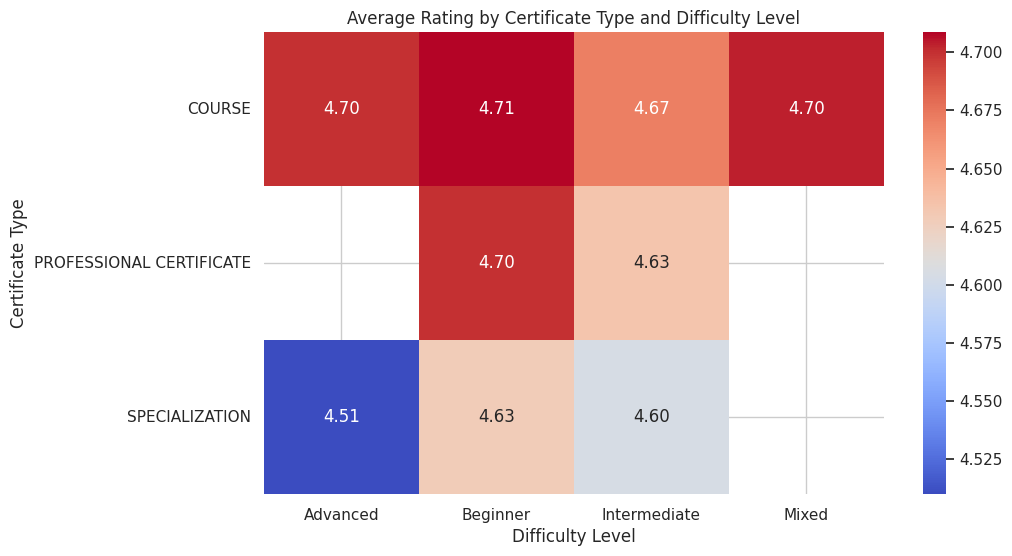

In [81]:
rating_by_type_difficulty = course_data.groupby(['course_Certificate_type', 'course_difficulty']).course_rating.mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(rating_by_type_difficulty, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Rating by Certificate Type and Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Certificate Type')
plt.show()


## Top 10 Most Enrolled Courses
This bar chart can highlight the courses with the highest enrollment, showcasing which courses are most popular among students.

<ipython-input-82-c0267684104e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


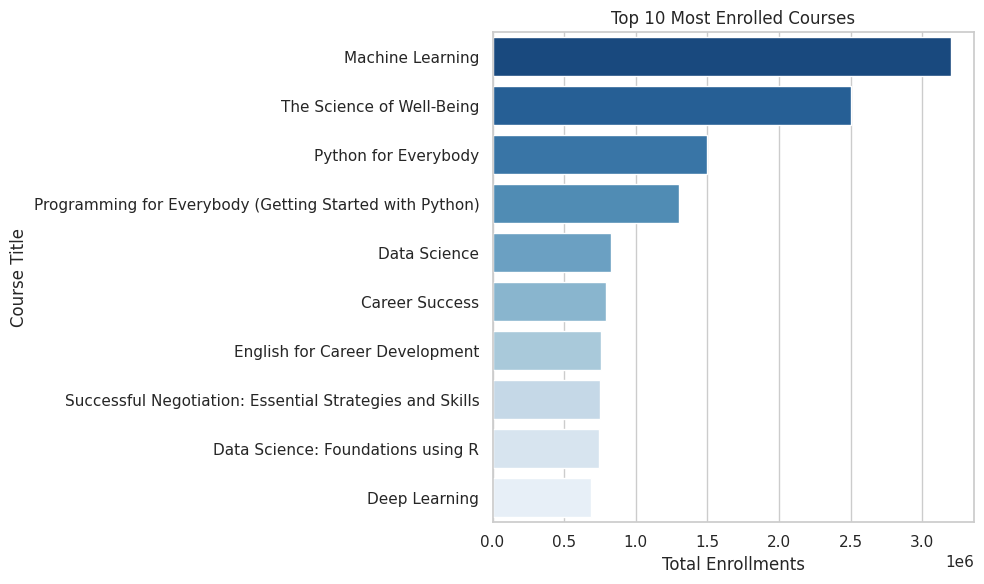

In [82]:
top_10_courses = course_data.nlargest(10, 'course_students_enrolled')


plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_courses,
    x='course_students_enrolled',
    y='course_title',
    palette='Blues_r'
)
plt.title('Top 10 Most Enrolled Courses')
plt.xlabel('Total Enrollments')
plt.ylabel('Course Title')
plt.tight_layout()
plt.show()


## Average Enrollment by Difficulty Level
A bar plot showing the average enrollment numbers per difficulty level, giving insights into whether students prefer beginner or advanced courses.

<ipython-input-84-f7f974c2c10d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


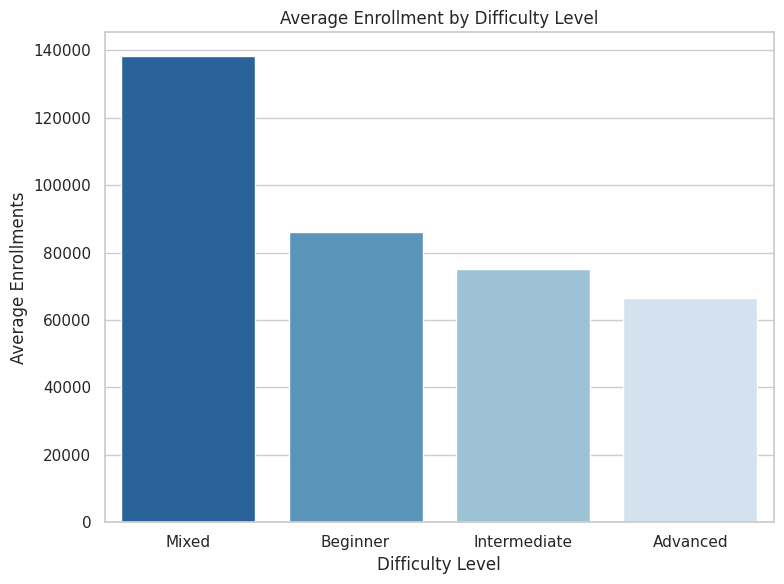

In [84]:
difficulty_enrollment = course_data.groupby('course_difficulty')['course_students_enrolled'].mean().reset_index()
difficulty_enrollment = difficulty_enrollment.sort_values(by='course_students_enrolled', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=difficulty_enrollment,
    x='course_difficulty',
    y='course_students_enrolled',
    palette='Blues_r'
)
plt.title('Average Enrollment by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Average Enrollments')
plt.tight_layout()
plt.show()